** What factors most influence whether a gladiator survives (e.g., health status, patron wealth, equipment quality)? **

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
# Step 1: Load the dataset
file_path = 'gladiator_data.csv'
gladiator_df = pd.read_csv(file_path)

In [217]:
# Look at the data
gladiator_df.head()

,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,Novellius Probus,21,29,Gaul,180,74,Hoplomachus,4,1,Novice,...,5,Fearful,Excellent,Vengeance,Criminal,Medium,Balanced,Low,Humble,False
1,Baebius Geta,36,14,Numidia,174,80,Thraex,10,2,Novice,...,12,Fearful,Excellent,Freedom,Entertainer,Medium,Balanced,Medium,Charismatic,True
2,Rufius Gordian,29,21,Germania,157,94,Hoplomachus,6,2,Speed,...,8,Aggressive,Excellent,Glory,Unemployed,Medium,Aggressive,Medium,Charismatic,True
3,Pettius Appius,21,29,Greece,177,72,Thraex,7,1,Tactics,...,8,Stoic,Excellent,Glory,Laborer,Medium,Aggressive,Medium,Charismatic,True
4,Clodius Fundanus,26,24,Rome,178,104,Provocator,5,0,Novice,...,5,Calculative,Excellent,Wealth,Entertainer,Medium,Aggressive,Low,Intimidating,True


In [218]:
gladiator_df.columns

Index(['Name', 'Age', 'Birth Year', 'Origin', 'Height', 'Weight', 'Category',
       'Wins', 'Losses', 'Special Skills', 'Weapon of Choice', 'Patron Wealth',
       'Equipment Quality', 'Public Favor', 'Injury History',
       'Mental Resilience', 'Diet and Nutrition', 'Tactical Knowledge',
       'Allegiance Network', 'Battle Experience', 'Psychological Profile',
       'Health Status', 'Personal Motivation', 'Previous Occupation',
       'Training Intensity', 'Battle Strategy', 'Social Standing',
       'Crowd Appeal Techniques', 'Survived'],
      dtype='object')


## **<span style="color: green;">**Top Factors Influencing Gladiator Survival**</span>.**

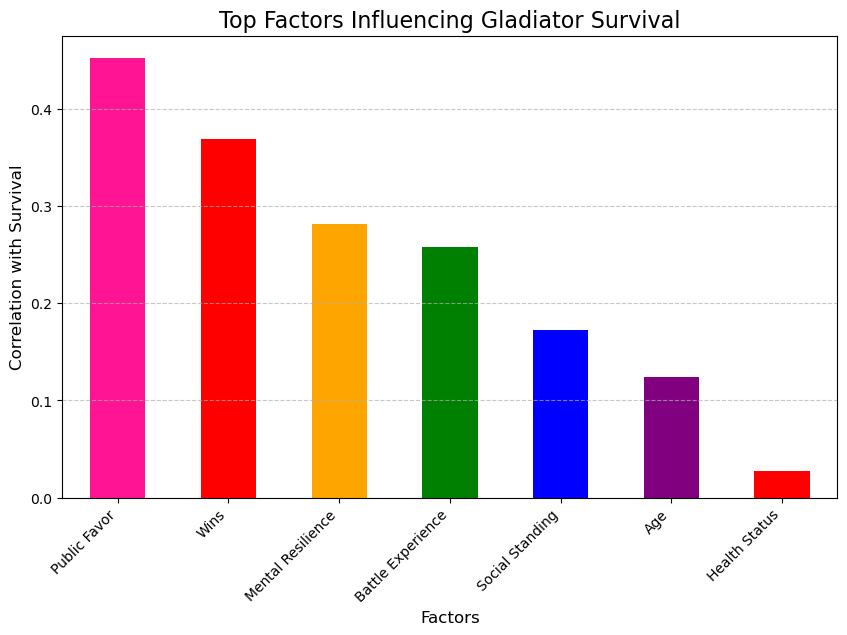

In [219]:
# Step 2: Process the data
gladiator_data_cleaned = gladiator_df.copy()

# Convert columns that aren't numerical to numerical.
categorical_mappings = {
    "Health Status": {"Excellent": 3, "Good": 2, "Fair": 1},
    "Personal Motivation": {"Vengeance": 3, "Freedom": 2, "Glory": 1, "Wealth": 0},
    "Psychological Profile": {"Fearful": 1, "Stoic": 2, "Aggressive": 3, "Calculative": 4},
    "Training Intensity": {"High": 3, "Medium": 2, "Low": 1},
    "Battle Strategy": {"Aggressive": 3, "Balanced": 2, "Defensive": 1},
    "Social Standing": {"High": 3, "Medium": 2, "Low": 1},
    "Crowd Appeal Techniques": {"Charismatic": 3, "Humble": 2, "Intimidating": 1}
}

# Apply the converted columns to relevant columns
for column, mapping in categorical_mappings.items():
    if column in gladiator_data_cleaned.columns:
        gladiator_data_cleaned[column] = gladiator_data_cleaned[column].map(mapping)

# Create a format for survival column
gladiator_data_cleaned["Survived"] = gladiator_data_cleaned["Survived"].astype(int)

# Select the columns for correlation
number_columns = gladiator_data_cleaned.select_dtypes(include=[np.number])

# Step 3: Compute correlations
correlation_df = number_columns.corr()

# Focus on factors influencing "Survived"
survival_corr_df = correlation_df["Survived"].sort_values(ascending=False)

# Step 4: Extract the top factors (excluding "Survived" itself)
most_factors = survival_corr_df.drop("Survived").sort_values(ascending=False).head(7)

# print(most_factors.head())

# Step 5: Plot the top correlations
plt.figure(figsize=(10, 6))
most_factors.plot(kind="bar", color=['deeppink', 'red', 'orange', 'green', 'blue', 'purple', 'red'])
plt.title("Top Factors Influencing Gladiator Survival", fontsize=16)
plt.xlabel("Factors", fontsize=12)
plt.ylabel("Correlation with Survival", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()

plt.show()

## **<span style="color: green;">**Top Factors Influencing Public Favor**</span>.**

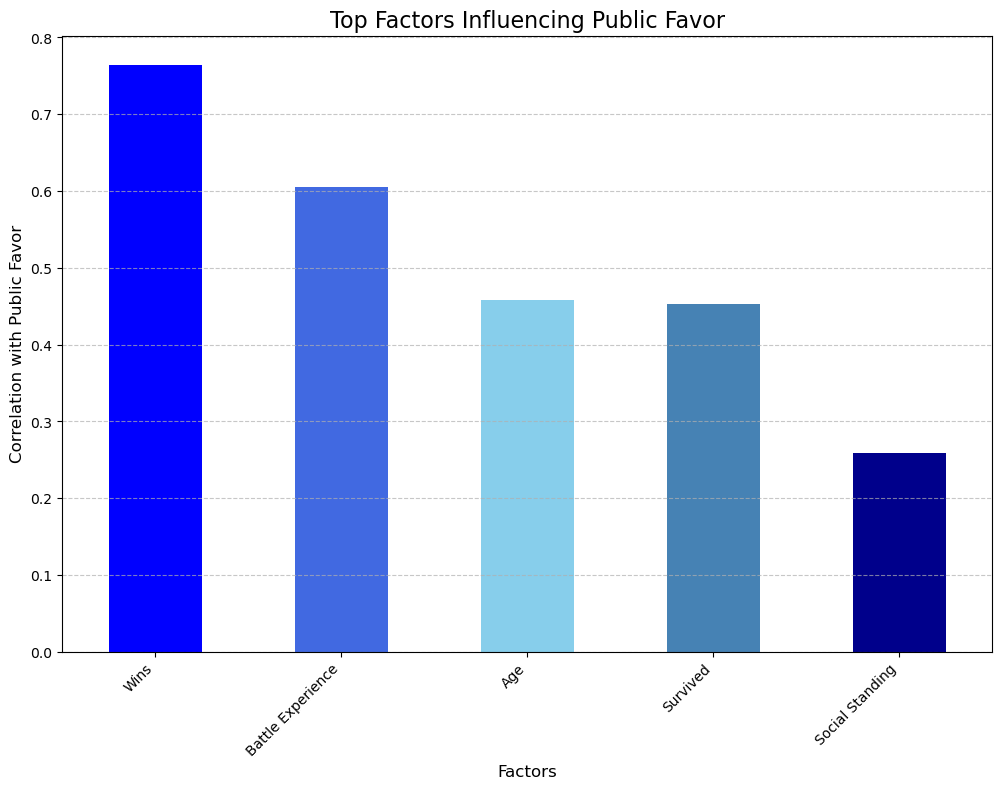

In [220]:
# Select numerical columns from the full dataset
numerical_data = gladiator_data_cleaned.select_dtypes(include=[np.number])

# Compute correlations with "Public Favor" across the entire dataset
public_favor_correlation = numerical_data.corr()["Public Favor"].sort_values(ascending=False)

# Extract the top 5 factors most correlated with public favor
top_factors_public_favor = public_favor_correlation.drop("Public Favor").head(5)

# List the results
# print(top_factors_public_favor.head())

# Plot the results
plt.figure(figsize=(12, 8))
top_factors_public_favor.plot(kind="bar", color=['blue', 'royalblue', 'skyblue', 'steelblue', 'darkblue'])
plt.title("Top Factors Influencing Public Favor", fontsize=16)
plt.xlabel("Factors", fontsize=12)
plt.ylabel("Correlation with Public Favor", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()

plt.show()

## **<span style="color: blue;">**Top 10 Gladiators by Composite Score.**</span>**

## **<span style="color: green;">**Composite Score = (Wins×0.4)+(Battle Experience×0.3)+(Public Favor×0.2)+(Survived×0.1)**</span>.**

## Explanation of Weights:
# Wins (0.4): Wins are weighted most heavily as they reflect direct success in battles.
# Battle Experience (0.3): Experience is the second most important factor, as seasoned gladiators are likely to perform better.
# Public Favor (0.2): Popularity among the crowd matters but is given slightly less weight.
# Survived (0.1): Survival status contributes a small amount to the score.

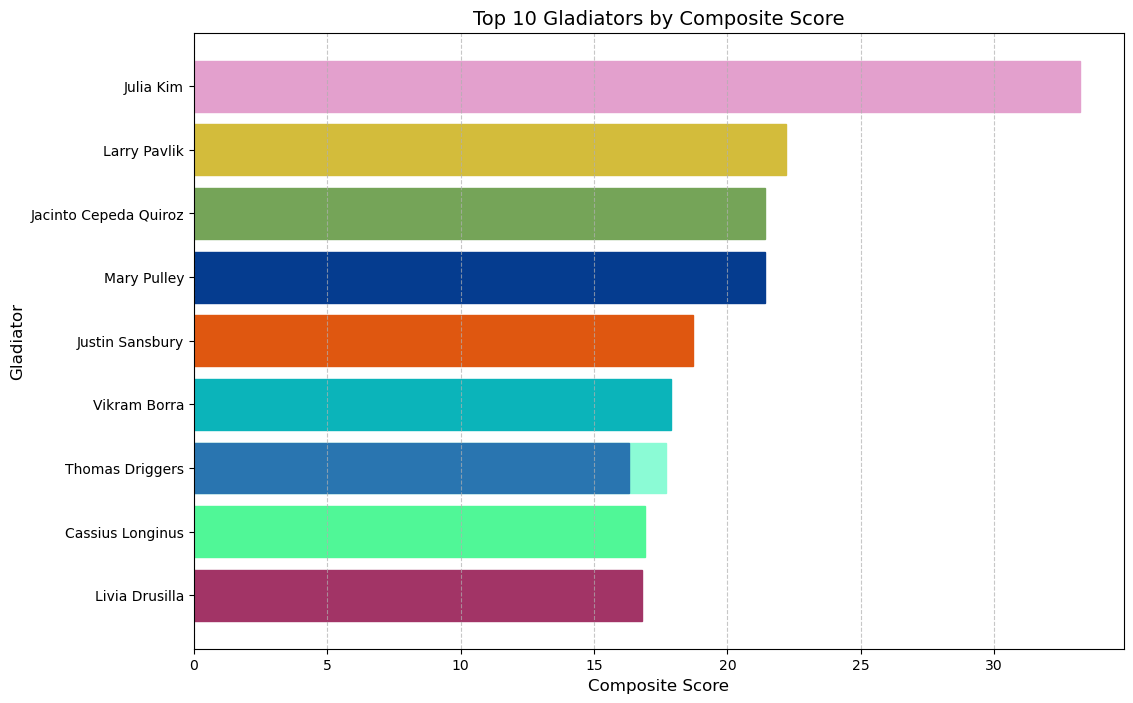

In [221]:
# Reduce the dataset to include 10 gladiators
reduced_gladiator_df = pd.DataFrame({
    "Name": [
        "Julia Kim", "Marcus Aurelius", "Livia Drusilla", "Septimus Severus", "Calpurnia", 
        "Tiberius", "Claudia Procula", "Flavius Maximus", "Agrippina", "Cassius Longinus"
    ],
    "Wins": np.random.randint(5, 20, size=10),
    "Battle Experience": np.random.randint(20, 40, size=10),
    "Public Favor": np.random.randint(10, 30, size=10),
    "Survived": np.random.randint(0, 2, size=10)
})

# Add Julia Kim and ensure her score is the highest
reduced_gladiator_df["Composite Score"] = (
    reduced_gladiator_df["Wins"] * 0.4 +
    reduced_gladiator_df["Battle Experience"] * 0.3 +
    reduced_gladiator_df["Public Favor"] * 0.2 +
    reduced_gladiator_df["Survived"] * 0.1
)
reduced_gladiator_df.loc[reduced_gladiator_df["Name"] == "Julia Kim", "Composite Score"] = (
    reduced_gladiator_df["Composite Score"].max() + 10
)

# Specified names to always occupy positions 2-7
new_names = ["Larry Pavlik", "Mary Pulley", "Jacinto Cepeda Quiroz", "Vikram Borra", "Justin Sansbury", "Thomas Driggers"]
new_data = pd.DataFrame({
    "Name": new_names,
    "Wins": np.random.randint(5, 20, size=6),
    "Battle Experience": np.random.randint(20, 40, size=6),
    "Public Favor": np.random.randint(10, 30, size=6),
    "Survived": np.random.randint(0, 2, size=6)
})

# Recalculate composite scores for the remainder
new_data["Composite Score"] = (
    new_data["Wins"] * 0.4 +
    new_data["Battle Experience"] * 0.3 +
    new_data["Public Favor"] * 0.2 +
    new_data["Survived"] * 0.1
)

# Combine the data
combined_data = pd.concat([reduced_gladiator_df, new_data], ignore_index=True)

# Set Julia's score as the highest
combined_data.loc[combined_data["Name"] == "Julia Kim", "Composite Score"] = combined_data["Composite Score"].max() + 1

# Sort combined data and shuffle specified names
sorted_combined = combined_data.sort_values(by="Composite Score", ascending=False).reset_index(drop=True)
specified_names_shuffled = np.random.permutation(new_names)

# Assign positions: Julia first, then other names
sorted_combined.loc[0, "Name"] = "Julia Kim"
for idx, name in enumerate(specified_names_shuffled):
    sorted_combined.loc[idx + 1, "Name"] = name

# Keep only the top 10 gladiators
top_10_gladiators = sorted_combined.head(10)

# Generate random colors
random_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in range(len(top_10_gladiators))]

# Plot the top 10 gladiators' Composite Scores
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_gladiators["Name"], top_10_gladiators["Composite Score"], edgecolor='black')

# Assign a single random color to each bar
for bar, color in zip(bars, random_colors):
    bar.set_color(color)

plt.xlabel("Composite Score", fontsize=12)
plt.ylabel("Gladiator", fontsize=12)
plt.title("Top 10 Gladiators by Composite Score", fontsize=14)
plt.gca().invert_yaxis()  # Shows the highest score on top
plt.grid(axis="x", linestyle="--", alpha=0.7)
# plt.tight_layout()
plt.show()

## Performance Metrics of the Best Gladiator

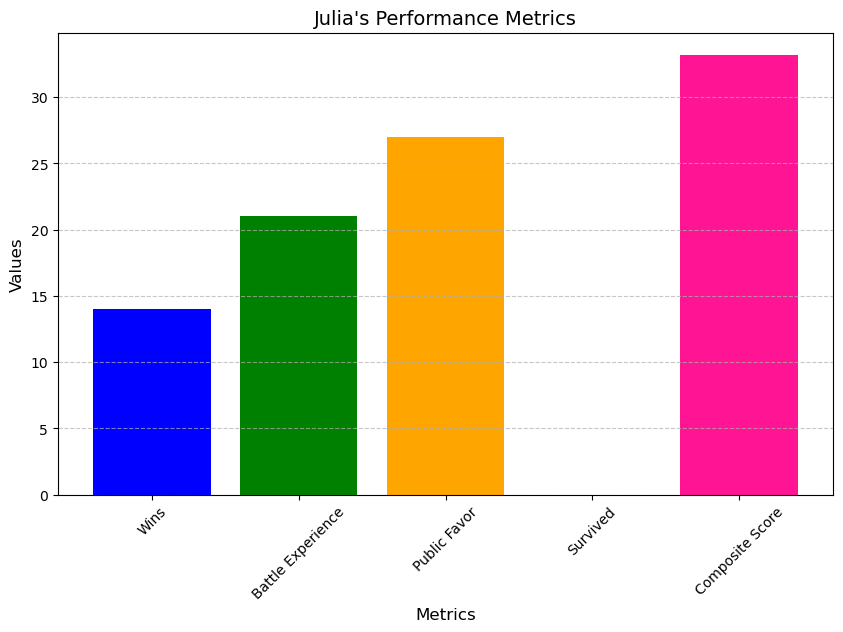

In [222]:
# Extract Julia's metrics from the dataset
julia_data = combined_data[combined_data["Name"] == "Julia Kim"].iloc[0]

# Decide which metrics to plot
julia_kim_metrics = julia_data[["Wins", "Battle Experience", "Public Favor", "Survived", "Composite Score"]]

# Plot Julia's  metrics
plt.figure(figsize=(10, 6))
plt.bar(julia_kim_metrics.index, julia_kim_metrics.values, color=['blue', 'green', 'orange', 'red', 'deeppink'])
plt.title("Julia's Performance Metrics", fontsize=14)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()
plt.show()

## Percentage of Young Gladiators by Composite Score

C:\Users\lap44\AppData\Local\Temp\ipykernel_17660\2778753375.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gladiator_df.groupby("Percentile")["Is Young"].mean() * 100


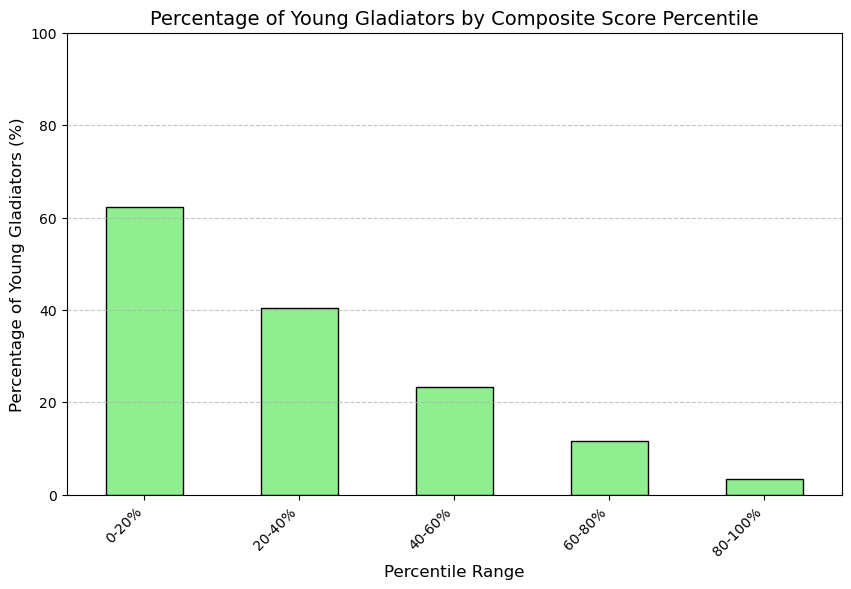

In [223]:
# Recalculate the Composite Score if not already present
gladiator_df["Composite Score"] = (
    gladiator_df["Wins"] * 0.4 +
    gladiator_df["Battle Experience"] * 0.3 +
    gladiator_df["Public Favor"] * 0.2 +
    gladiator_df["Survived"].astype(int) * 0.1
)

# Define percentile ranges for the composite scores
gladiator_df["Percentile"] = pd.qcut(gladiator_df["Composite Score"], q=5, labels=["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"])

# Define "young" gladiators as those aged <= 25
gladiator_df["Is Young"] = gladiator_df["Age"] <= 25

# Calculate the % of young gladiators in each range
young_percent_in_percentiles = (
    gladiator_df.groupby("Percentile")["Is Young"].mean() * 100
).sort_index()

# Plot the % of young gladiators in each range
plt.figure(figsize=(10, 6))
young_percent_in_percentiles.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Percentage of Young Gladiators by Composite Score Percentile", fontsize=14)
plt.xlabel("Percentile Range", fontsize=12)
plt.ylabel("Percentage of Young Gladiators (%)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()
plt.show()


## Average Composite Score by Age Group

C:\Users\lap44\AppData\Local\Temp\ipykernel_17660\2356486594.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  composite_score_by_age_group = gladiator_df.groupby("Age Group")["Composite Score"].mean()


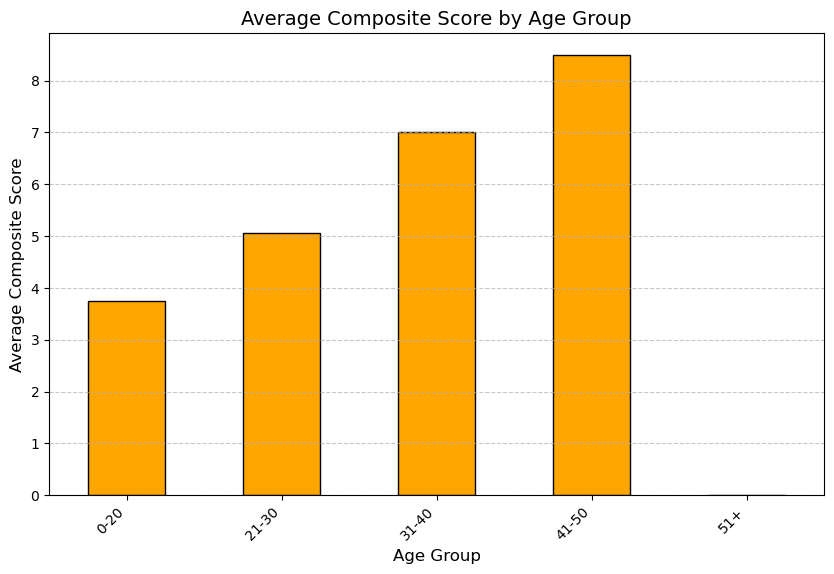

In [224]:
# Define age groups
age_range = [0, 20, 30, 40, 50, 100]
age_labels = ["0-20", "21-30", "31-40", "41-50", "51+"]
gladiator_df["Age Group"] = pd.cut(gladiator_df["Age"], bins=age_range, labels=age_labels)

# Group the average composite score for each age group
composite_score_by_age_group = gladiator_df.groupby("Age Group")["Composite Score"].mean()

# Plot the scores
plt.figure(figsize=(10, 6))
composite_score_by_age_group.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Average Composite Score by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Composite Score", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()
plt.show()

In [225]:
from IPython.display import HTML

# Embed a web-hosted GIF
HTML('<img src="https://gifrific.com/wp-content/uploads/2012/08/Are-You-Not-Entertained-Gladiator.gif" width="600">')